In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from modflow_models import transport_model

In [40]:
head, concentration_data = transport_model(
    sim_ws='./simulation/mycase',
    species_list=["Ca", "Mg", "Cl"],
    perlen=1095,
    nstp=120,
    initial_conc=np.ones(120000) * 0.05,
    bc=[0.1, 0.1, 0.1],
    porosity=0.30,
    K11=1.0,
    initial_density=1000.0,
    initial_head=100.0
)

FileNotFoundError: ./examples/example9_jool/input_data/idomain.txt not found.

In [3]:
concentration_data = np.array(concentration_data).reshape(3, 120, 100, 400)
concentration_data.shape

(3, 120, 100, 400)

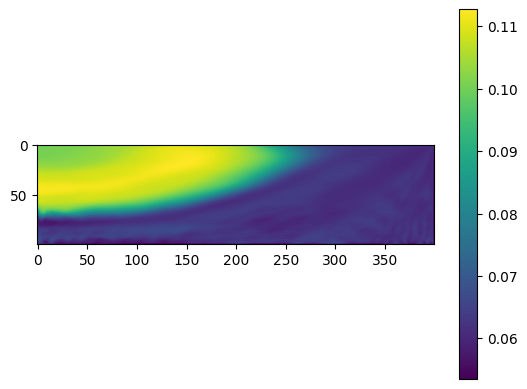

In [4]:
plt.imshow(concentration_data[2, 50])
plt.colorbar()

In [5]:
import flopy.utils.binaryfile as bf

density_file = './simulation/mycase/model_density.bin'

den_obj = bf.HeadFile(density_file, text='DENSITY')


In [6]:
times = den_obj.get_times()
print(f"文件中包含的时间步: {times}")

文件中包含的时间步: [9.125, 18.25, 27.375, 36.5, 45.625, 54.75, 63.875, 73.0, 82.125, 91.25, 100.375, 109.5, 118.625, 127.75, 136.875, 146.0, 155.125, 164.25, 173.375, 182.5, 191.625, 200.75, 209.875, 219.0, 228.125, 237.25, 246.375, 255.5, 264.625, 273.75, 282.875, 292.0, 301.125, 310.25, 319.375, 328.5, 337.625, 346.75, 355.875, 365.0, 374.125, 383.25, 392.375, 401.5, 410.625, 419.75, 428.875, 438.0, 447.125, 456.25, 465.375, 474.5, 483.625, 492.75, 501.875, 511.0, 520.125, 529.25, 538.375, 547.5, 556.625, 565.75, 574.875, 584.0, 593.125, 602.25, 611.375, 620.5, 629.625, 638.75, 647.875, 657.0, 666.125, 675.25, 684.375, 693.5, 702.625, 711.75, 720.875, 730.0, 739.125, 748.25, 757.375, 766.5, 775.625, 784.75, 793.875, 803.0, 812.125, 821.25, 830.375, 839.5, 848.625, 857.75, 866.875, 876.0, 885.125, 894.25, 903.375, 912.5, 921.625, 930.75, 939.875, 949.0, 958.125, 967.25, 976.375, 985.5, 994.625, 1003.75, 1012.875, 1022.0, 1031.125, 1040.25, 1049.375, 1058.5, 1067.625, 1076.75, 1085.875, 1095.0

In [7]:
last_time = times[-1]
density_array = den_obj.get_data(totim=last_time)

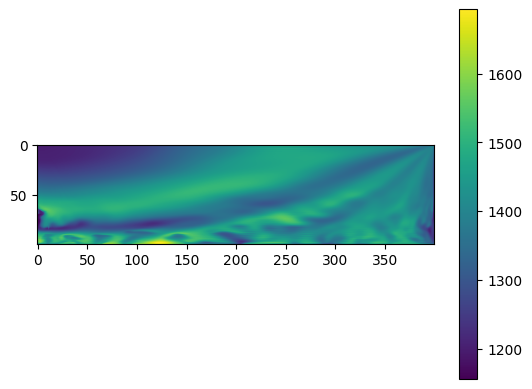

In [8]:
plt.imshow(density_array[:, :, 0])
plt.colorbar()

In [18]:
import modflowapi
modflow_api = modflowapi.ModflowApi("C:\\ProgramFiles\\MODFLOW\\libmf6.dll", working_directory="./simulation/mycase/")
modflow_api.initialize()

In [23]:
tag = modflow_api.get_var_address("X", "gwt_density")
modflow_api.get_value(tag).shape

(40000,)

In [24]:
modflow_api.set_value(tag, np.ones(40000))

In [25]:
modflow_api.get_value(tag)

array([1., 1., 1., ..., 1., 1., 1.])

In [9]:
print("\n密度数组的形状:", density_array.shape)
print("最后一个时间步的密度数据 (部分):")
print(density_array)


密度数组的形状: (100, 400, 1)
最后一个时间步的密度数据 (部分):
[[[1198.844     ]
  [1198.87263793]
  [1198.9186856 ]
  ...
  [1378.91217922]
  [1379.56461347]
  [1380.32663753]]

 [[1198.91251355]
  [1199.01521278]
  [1199.11430894]
  ...
  [1378.07485933]
  [1383.94981476]
  [1382.61426979]]

 [[1199.16293792]
  [1199.46472317]
  [1199.51434784]
  ...
  [1388.24966273]
  [1390.81830498]
  [1376.07640591]]

 ...

 [[1422.11451738]
  [1577.22413173]
  [1601.31980183]
  ...
  [1309.82018162]
  [1282.24036337]
  [1274.7243515 ]]

 [[1420.41700842]
  [1550.44325328]
  [1576.49270752]
  ...
  [1303.95021839]
  [1291.07234639]
  [1286.77818231]]

 [[1406.66472873]
  [1447.75677296]
  [1478.88246986]
  ...
  [1344.45589189]
  [1330.36308807]
  [1311.08997496]]]


In [14]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_array_from_GMS(filename):
    """
    读取矩阵型的文件, 通常为 idomain, K 等
    """
    data = np.genfromtxt(filename, delimiter='\t')
    # 将所有 NaN 替换成 -1
    data = np.nan_to_num(data, nan=0)
    return data

data = read_array_from_GMS(filename="hei.txt")

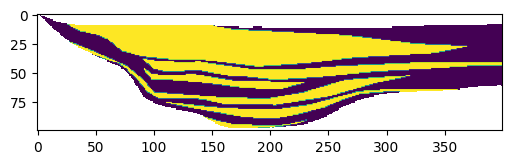

In [17]:
data = np.genfromtxt("./input_data/K11.txt", delimiter='\t')
plt.figure(figsize=(6,5))
plt.imshow(data)

In [44]:
arr = np.loadtxt("./input_data/idomain.txt")
np.sum(arr == 1)

23965

In [38]:
chd_data = np.loadtxt("./input_data/chd.txt")
chd_data = chd_data[:, [2, 0, 1]] - 1

chd_spd = []
for i in np.arange(data.shape[0]):
    chd_spd.append([tuple(data[i].astype(int)), 60.0,])
chd_spd = np.array(chd_spd, dtype=object)
chd_spd

array([[(0, 9, 399), 60.0],
       [(0, 10, 399), 60.0],
       [(0, 11, 399), 60.0],
       [(0, 12, 399), 60.0],
       [(0, 13, 399), 60.0],
       [(0, 14, 399), 60.0],
       [(0, 15, 399), 60.0],
       [(0, 16, 399), 60.0],
       [(0, 17, 399), 60.0],
       [(0, 18, 399), 60.0],
       [(0, 19, 399), 60.0],
       [(0, 20, 399), 60.0],
       [(0, 21, 399), 60.0],
       [(0, 22, 399), 60.0],
       [(0, 23, 399), 60.0],
       [(0, 24, 399), 60.0],
       [(0, 25, 399), 60.0],
       [(0, 26, 399), 60.0],
       [(0, 27, 399), 60.0],
       [(0, 28, 399), 60.0],
       [(0, 29, 399), 60.0],
       [(0, 30, 399), 60.0],
       [(0, 31, 399), 60.0],
       [(0, 32, 399), 60.0],
       [(0, 33, 399), 60.0],
       [(0, 34, 399), 60.0],
       [(0, 35, 399), 60.0],
       [(0, 36, 399), 60.0],
       [(0, 37, 399), 60.0],
       [(0, 38, 399), 60.0],
       [(0, 39, 399), 60.0],
       [(0, 40, 399), 60.0],
       [(0, 41, 399), 60.0],
       [(0, 42, 399), 60.0],
       [(0, 43,